Preliminary Data Analysis of Mozilla SurveyGizmo Feedback Data

Note: must also install vaderSentiment (pip install vaderSentiment), and assumes that files 'Top Sites for Report Analysis.csv' and '20180912113810-SurveyExport.csv' are located in the same directory as the file

In [179]:
import pandas as pd

In [180]:
# for columns A and B in the top 100, get strings in cells, comma, split by comma, 
#then save and check if data contains these values
sites = pd.read_csv('./Top Sites for Report Analysis.csv', header=None, usecols=[0,1])
#, skiprows = 50, nrows = 25
sites.head(25)

siteList = list(sites.values.flatten())
print(siteList)

#remove commas ('salesforce.com, force.com')

['Domains', 'Brand', 'google.*', 'Google Search', 'mail.google.com', 'Gmail', 'docs.google.com, sheets.google.com, calendar.google.com', 'Google Suite, Gdocs, Google Sheets, Google Calendar', 'keep.google.com', 'Google Keep', 'youtube.com', 'Youtube', 'facebook.com', 'Facebook', 'baidu.com', 'Baidu', 'wikipedia.org', 'Wiki, Wikipedia', 'yahoo.*', 'Yahoo', 'mail.yahoo.*', 'Yahoo Mail', 'qq.com', 'QQ', 'tmall.com', 'tmall', 'taobao.com', 'Taobao', 'twitter.com', 'Twitter', 'amazon.com', 'Amazon, Amazon Prime, Amazon Music', 'instagram.com', 'Instagram', 'vk.com', 'vk.com', 'sohu.com', 'sohu.com', 'live.com', 'live.com', 'outlook.live.com', 'Outlook.com', 'office.live.com, microsoftonline.com, office.com', 'Office 365', 'onedrive.live.com', 'OneDrive', 'jd.com', 'JD.com', 'reddit.com', 'Reddit', 'yandex.ru', 'Yandex', 'mail.yandex.ru', 'Yandex Mail', 'news.yandex.ru', 'Yandex News', 'weibo.com', 'weibo.com', 'sina.com.cn', 'sina.com.cn', '360.cn', '360.cn', 'blogspot.com', 'Blogspot', 'li

In [154]:
fields = ['KI', 'KN', 'KP']
df = pd.read_csv("./20180912113810-SurveyExport.csv", encoding = "ISO-8859-1", header=None, usecols=[294, 299, 301], dtype="str")
df.columns = ['Sentiment', 'Positive Feedback', 'Negative Feedback']

if df.empty:
    print('DataFrame is empty!')
else:
    print('Not empty!')
    
df.describe()
df.head(20)

Not empty!


,Sentiment,Positive Feedback,Negative Feedback
count,291825,146352,145402
unique,3,119883,137228
top,Happy,Good,THE LATEST VERSION WON'T GO BACK OR FORWARD. I...
freq,146409,961,2814


In [213]:
# rows that contain mention of anything in siteList
# BROKEN - currently only filters on the first column
refined = df[ (df['Negative Feedback'].str.contains('|'.join(siteList))) | (df['Positive Feedback'].str.contains('|'.join(siteList))) ]

In [210]:
refined.describe()

,Sentiment,Positive Feedback,Negative Feedback
count,12315,0.0,12315
unique,1,0.0,11779
top,Sad,NaN,bring back the old yahoo toolbar !!!!
freq,12315,NaN,162


In [129]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [194]:
nltk_results = [print_sentiment_scores(string) for string in refined['Negative Feedback']]
#print(nltk_results)

nltk_df = pd.DataFrame(nltk_results, dtype="str")
    
results = refined.join(nltk_df)
results.describe()
results.head(20)

,Sentiment,Positive Feedback,Negative Feedback,compound,neg,neu,pos
75,Sad,NaN,"While vistsing Google Maps, the entire browser...",-0.8745,0.099,0.881,0.02
86,Sad,NaN,"After the recent update to 50.1, Facebook page...",0.0,0.0,1.0,0.0
89,Sad,NaN,Since upgrading my recent version of Firefox I...,0.0,0.0,1.0,0.0
96,Sad,NaN,Problem starting Netflix movie playback.,-0.2732,0.231,0.769,0.0
164,Sad,NaN,My favourite addon â Tree Style Tab âÂ wor...,0.0,0.0,1.0,0.0
167,Sad,NaN,when I get to Facebook via Firefox & att yahoo...,-0.481,0.141,0.859,0.0
218,Sad,NaN,En Facebook me arroja errores de duplicado de ...,-0.8316,0.206,0.794,0.0
228,Sad,NaN,https://www.google.co.jp/ Peer's Certificate i...,0.7213,0.0,0.806,0.194
241,Sad,NaN,This linking to Yahoo behind the code so even ...,0.0,0.0,1.0,0.0
258,Sad,NaN,"Slower than chrome, images not as clear as oth...",0.0,0.0,1.0,0.0


In [195]:
results.describe()

,Sentiment,Positive Feedback,Negative Feedback,compound,neg,neu,pos
count,12315,0.0,12315,380,380,380,380
unique,1,0.0,11779,214,154,178,120
top,Sad,NaN,bring back the old yahoo toolbar !!!!,0.0,0.0,1.0,0.0
freq,12315,NaN,162,122,148,121,208


AttributeError: Unknown property column

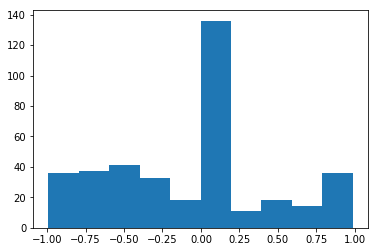

In [205]:
histColumn = results['compound'].astype('float')

histColumn.hist(column = "compound")

In [208]:
refined.to_csv('refined.csv')
nltk_df.to_csv('nltk_df.csv')
results.to_csv('results.csv')